## 案例1：给定一个二维数据集，使用 Kmeans 进行聚类
+ 数据集： data/ex7data2.mat

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [3]:
data1 = sio.loadmat('data/ex7data2.mat')
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [10]:
X = data1['X']
X.shape # 300 个样本， 2 个特征

(300, 2)

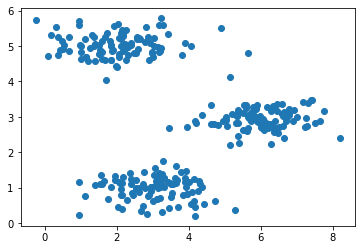

In [9]:
plt.scatter(X[:,0],X[:,1])
plt.show()

## 1.获取每个样本所属的类别

In [39]:
def find_centros(X, centros): # 传入 X 数据集，centros 表示聚类中心点所在的位置
    idx = [] # 存放每个样本最终所属的类别
    
    for i in range(len(X)):
        dist = np.linalg.norm((X[i] - centros),axis=1) #(k,)
        id_i = np.argmin(dist)
        idx.append(id_i)
        
    return np.array(idx)

In [40]:
centros = np.array([[3,3], [6,2], [8,5]])
idx = find_centriods(X,centros)

In [41]:
idx[:3]

array([0, 2, 1], dtype=int64)

## 2.计算聚类中心点

In [42]:
def compute_centros(X,idx,k):
    centros = []
    
    for i in range(k):
        centros_i = np.mean(X[idx==i],axis=0)
        centros.append(centros_i)
    return np.array(centros)

In [43]:
compute_centros(X,idx,k=3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

## 3.运行 Kmeans, 重复执行 1 和 2

In [47]:
def run_kmeans(X,centros,iters):
    
    k = len(centros)
    centros_all = []
    centros_all.append(centros)
    centros_i = centros
    for  i in range(iters):
        idx = find_centros(X,centros_i)
        centros_i = compute_centros(X,idx,k)
        centros_all.append(centros_i)
        
    return idx, np.array(centros_all)

## 绘制数据集和聚类中心的移动轨迹

In [48]:
def plot_data(X,centros_all,idx):
    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=idx,cmap='rainbow')
    plt.plot(centros_all[:,:,0], centros_all[:,:,1],'kx--') # 三维(迭代次数，类别数，特征数)

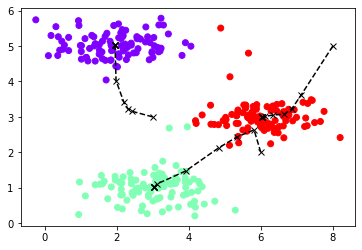

In [50]:
idx, centros_all = run_kmeans(X,centros,iters=10)
plot_data(X,centros_all,idx)

## 观察初始聚类点的位置对聚类效果的影响

In [51]:
def init_centros(X,k):
    index = np.random.choice(len(X),k)
    return X[index]

In [53]:
init_centros(X,k=3)

array([[3.56478625, 1.11764714],
       [2.47053695, 4.80418944],
       [2.97970391, 4.80671081]])

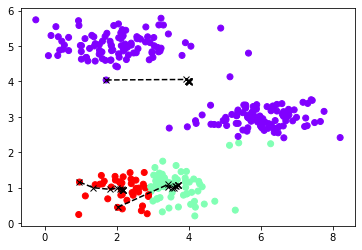

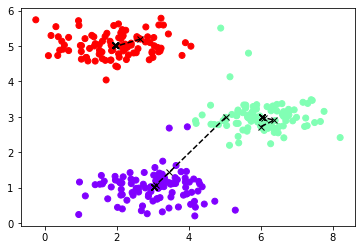

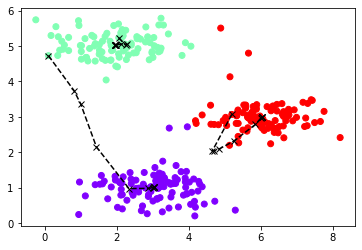

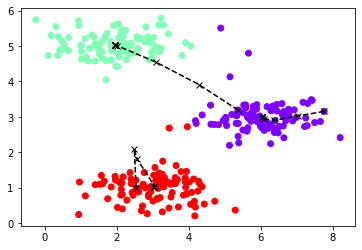

In [56]:
for i in range(4):
    idx, centros_all = run_kmeans(X,init_centros(X,k=3),iters=10)
    plot_data(X,centros_all,idx)
    # 可以看到有些由于初始位置选择不当，只达到了局部最优值

---

## 案例2：使用 kmeans 对图片颜色进行聚类
+ RGB图像，每个像素点值范围 0-255
+ 数据集：data/bird_small.mat, data/bird_small.png

In [59]:
data = sio.loadmat('data/bird_small.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'A'])

In [60]:
A = data['A']
A.shape

(128, 128, 3)

In [63]:
from skimage import io

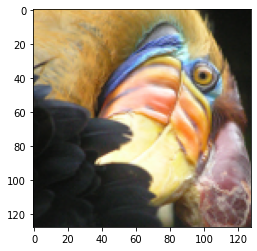

In [64]:
image = io.imread('data/bird_small.png')
plt.imshow(image)

In [65]:
A = A / 255 # 标准化处理
A = A.reshape(-1,3)

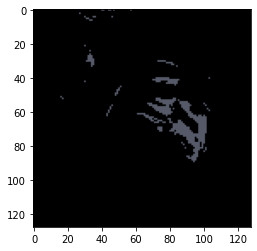

In [70]:
k = 16
idx, centros_all = run_kmeans(A,init_centros(A,k=16),iters=20)
centros = centros_all[-1]
im = np.zeros(A.shape)
for i in range(k):
    im[idx==1] = centros[i]
im = im.reshape(128,128,3)
plt.imshow(im)